# Bem Vindo à Calculadora de Vigas!
## Feita por Laryssa Ferro e Lucas Silva

- Aqui é possivel ver o codigo escrito e os dados que ele gera! 

- É só clicar no Run na barra no topo da pagina para entrar com novos dados ou graficos. 

- Sempre que uma celular gerar uma saida, ela aparecera logo abaixo da celula!

- Prefira seguir de forma a descer a página, ou seja, ao alterar um dado reinicie desde o inicio da pagina!


## As duas celulas a seguir sao apenas para que o codigo funcione e seja capaz de computar e gerar gráficos

In [2]:
import matplotlib

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# permite que se mostre os gráficos nesse ambiente
%matplotlib inline 

## A celula a seguir recebe os dados essenciais da Viga, clique nela e em Run para inserir os valores, que serao solicitados a seguir embaixo da celula.

![Modelo do Trabalho](viga.jpg)



In [ ]:
#recebendo dados

viga = float(input("Digite o comprimento (2) da Viga (m):"))

while viga <= 0:
    print("    O  valor de comprimento nao pode ser 0 ou negativo! Tente novamente")
    viga = float(input("Digite o comprimento (2) da Viga (m):"))

else:
    print("    Comprimento da viga registrado!")

    
Fp = float(input("Digite o valor F2 da carga concentrada (N):"))

while Fp <= 0:
    print("    O  valor de carga nao pode ser 0 ou negativo! Tente novamente")
    Fp = float(input("Digite o valor F2 da carga concentrada (N):"))

else:
    print("    Valor da carga concentrada registrado!")


Fpx = float(input("Digite a posicao (1) da carga concentrada (m):"))

while Fpx > viga:
    print("    A posicao da carga concentrada nao pode fora da extensao da viga! Tente novamente")
    Fpx = float(input("Digite a posicao (1) da carga concentrada (m):"))

else:
    print("    Posicao da carga concentrada registrada!")
    
Ft = float(input("Digite o valor maximo F1 da carga distribuida (N):"))
while Ft <= 0:
    print("    O  valor de carga nao pode ser 0 ou negativo! Tente novamente")
    Ft = float(input("Digite o valor F1 da carga concentrada (N):"))

else:
    print("    Valor da carga distribuida registrado!")

Ftx = float(input("Digite a posicao final (3) da carga distribuida (m):"))

while Ftx > viga:
    print("    A posicao final da carga distribuida nao pode fora da extensao da viga! Tente novamente")
    Ftx = float(input("Digite a posicao final (3) da carga distribuida (m):"))

else:
    print("    Posicao da carga distribuida registrada!")
    


## Com os dados inseridos, é possivel calcular as reacoes de apoio no engaste.
- Clique na celula abaixo e em Run para obter dados!

In [8]:
#calcula reacao do apoio cortante
def ReacaoV(b,h,c):
    return b*h/2 + c

print("A reacao de apoio cortante tem valor(N):", ReacaoV(Ftx, Ft, Fp))

# calcula a reacao de apoio momento
def ReacaoM(a,b,c,d):
    return a*b + c*d

#forca distribuida -> ponto

fmed= (Ft*Ftx)/2
print("O valor equivalente da carga distribuida para um ponto (N):", fmed)

xmed = Ftx/3
print("A posição de aplicação equivalente da carga distribuida (m):", xmed)

print("A reacao de apoio de momento tem valor(N*m):", ReacaoM(fmed,xmed,Fp, Fpx))


A reacao de apoio cortante tem valor(N): 35.0
O valor equivalente da carga distribuida para um ponto (N): 25.0
A posição de aplicação equivalente da carga distribuida (m): 1.6666666666666667
A reacao de apoio de momento tem valor(N*m): 141.66666666666669


## A celula a seguir define, na linguagem de programacao escolhida, como calcular o diagrama de esforco cortante.

In [6]:
#diagrama cortante

def W(a):  
    return(Ft*a - (Ft*a**2)/(2*Ftx))

def Cortante1(b): 
    return ReacaoV(Ftx, Ft, Fp) - W(b)
   

O valor equivalente da carga distribuida para um ponto (N): 25.0
A posição de aplicação equivalente da carga distribuida (m): 1.6666666666666667
A reacao de apoio de momento tem valor(N*m): 141.66666666666669


## A seguir, com essa funcao, é possivel gerar o grafico!

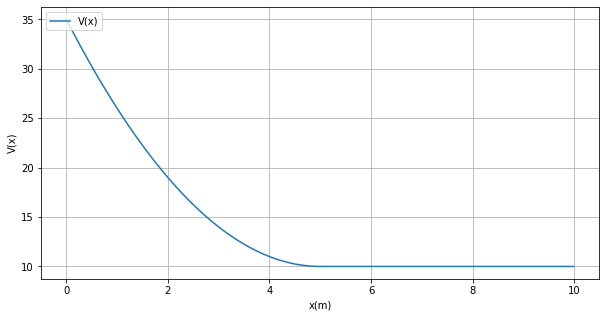

In [7]:
# Fazendo o gráfico da viga
import numpy as np                  # obtém acesso aos rápidos arrays da numpy 
import matplotlib.pyplot as plt     # Para fazer os gráficos das funções



x0 = 0              # Valor inicial de x
xf = viga      # Valor final de x
dx = 0.01            # Passo da discretização dx = (xf - x0)/(np-1)

x = np.arange(x0, xf, dx)                 # cria um vetor de dados x-data
y = Cortante1(x)                         # calcula o vetor de dados y-data

for i in range (0,len(x)):
   if x[i] > Ftx:
      y[i] = Fp

        
largura = 10  # Largura da figura
altura  = 5   # Altura da figura
plt.figure(figsize =(largura, altura))     # Define o tamanho do gráfico
plt.grid()                       # Habilita a grade 
plt.xlabel('x(m)')
plt.ylabel('V(x)')
plt.title('')
plt.plot(x, y, label="V(x)")   # Faz o gráfico      
plt.legend(loc="upper left")        # Habilita as legendas
plt.show()



## Para ter acesso a um valor especifico, use a celula seguinte. 
- Clique em Run quantas vezes quiser.

In [8]:
#valor de V(x) em um ponto

valorV=float(input("Escolha um valor de x para saber o V(X): "))

if (valorV > viga) or (valorV < 0):
    while valorV > viga or (valorV < 0):
        print("    A posicao nao pode fora da extensao da viga! Tente novamente")
        valorV = float(input("Escolha um valor de x para saber o V(X):" ))
    else: print(Cortante1(valorV))
elif (valorV>=Ftx):
    while valorV > viga or (valorV < 0):
        print("    A posicao nao pode fora da extensao da viga! Tente novamente")
        valorV = float(input("Escolha um valor de x para saber o V(X):" ))
    else: print(Fp)
        
elif (valorV==0):
    print(Cortante1(0))


Escolha um valor de x para saber o V(X): 5
10.0


## A celula a seguir define, na linguagem de programacao escolhida, como calcular o diagrama de momento.

In [9]:
#diagrama momento
    
def M(a):
    v = ReacaoV(Ftx, Ft, Fp)
    m = ReacaoM(fmed,xmed,Fp,Fpx)
    terc= Ft/(6*Ftx)
    seg= -Ft/2    
    return ( seg*(a**2) + terc*(a**3) + v*a -m)

def M2(b):
    return Fp*(viga-Fpx) - (Ft*Ftx/2)*(viga-b-(Ftx/3))
   

## A seguir, com essa funcao, é possivel gerar o grafico!

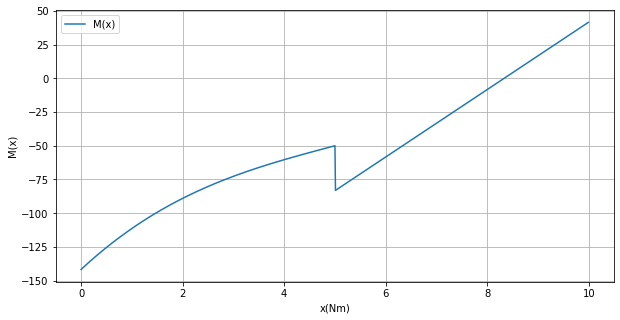

In [10]:
# Fazendo o gráfico da viga
import numpy as np                  
import matplotlib.pyplot as plt     



x0 = 0              # Valor inicial de x
xf = viga            # Valor final de x
dx = 0.01            # Passo da discretização dx = (xf - x0)/(np-1)

x = np.arange(x0, xf, dx)                 # cria um vetor de dados x-data
y = M(x)                         # calcula o vetor de dados y-data

for i in range (0,len(x)):
   if x[i] > Ftx:
      y[i] = M2(x[i])

        
largura = 10  # Largura da figura
altura  = 5   # Altura da figura
plt.figure(figsize =(largura, altura))     # Define o tamanho do gráfico
plt.grid()                       # Habilita a grade 
plt.xlabel('x(Nm)')
plt.ylabel('M(x)')
plt.title('')
plt.plot(x, y, label="M(x)")   # Faz o gráfico      
plt.legend(loc="upper left")        # Habilita as legendas
plt.show()


## Para ter acesso a um valor especifico, use a celula seguinte. 
- Clique em Run quantas vezes quiser.

In [11]:
#valor de M(x) em um ponto


valorM=float(input("Escolha um valor de x para saber o M(x): "))

if (valorM==viga):
    print("Na borda:", M2(viga))

if (valorM==Ftx):
    print("Na quina:", M(valorM))

if (valorM < Ftx) and (valorM>0):
    print("Dentro da distribuida tenta1:", M(valorM))
    
if (valorM > Ftx) and (valorM<viga):
    print("Fora da distribuida tenta1:", M2(valorM))

if (valorM > viga) or (valorM <0):
    while valorM > viga or valorM < 0 :
        print("    A posicao nao pode fora da extensao da viga! Tente novamente")
        valorM = float(input("Escolha um valor de x para saber o M(x):" ))
        if(valorM<Ftx) and (valorM>0):
            print("Dentro da distribluida", M(valorM))
        elif (valorM>Ftx) and (valorM<viga):
            print("Fora da distribuida:", M2(valorM))
            
elif (valorM==0):
    print("No zero:", M(0))

Escolha um valor de x para saber o M(x): 6
Fora da distribuida tenta1: -58.33333333333333


## A celula seguinte serve para escolher a geometria da secao transversal da viga. 
## - Digite 1 ou 2.

![Tipos de Viga](secoes.png)

In [26]:
#entradas para tensao

geo=int(input("Escolha uma configuracao de geometria, digitando 1 ou 2: "))

while geo > 2 :
    geo=int(input("    Escolha invalida, digite 1 ou 2: "))

while geo < 0 :
    geo=int(input("    Escolha invalida, digite 1 ou 2: "))

if (geo == 1):
    print("Geometria retangular da secao transversal foi escolhida!")
elif (geo == 2):
        print("Geometria I da secao transversal foi escolhida!")
        
#dimensoes 

h=float(input("Digite a altura h da secao transversal (cm): "))

while h <= 0 :
    h=float(input("    Escolha invalida, digite um numero positivo nao nulo (cm): "))

l=float(input("Digite a largura l da secao transversal (cm): "))

while l <= 0 :
    l=float(input("    Escolha invalida, digite um numero positivo nao nulo (cm): "))
    
if geo==2:
    hlinha=float(input("Digite a altura h' da secao transversal (cm): "))
    while hlinha <= 0 :
        hlinha=float(input("    Escolha invalida, digite um numero positivo nao nulo (cm): "))



Escolha uma configuracao de geometria, digitando 1 ou 2: 2
Geometria I da secao transversal foi escolhida!
Digite a altura h da secao transversal (cm): 10
Digite a largura l da secao transversal (cm): 10
Digite a altura h' da secao transversal (cm): 2


## A celula a seguir define as funcoes para as variacoes possiveis de calculo de momento de inercia e tensao normal possiveis, a serem usadas de acordo com a escolha de secao transversal

In [27]:
#calcular momento de inercia da viga I, nao tenho certeza se preciso em x ou y entao fiz os dois

def inerciaCalcIx(var):
    H=var-(2*hlinha)
    b=hlinha
    a=hlinha
    B=l
    Ix= (b*H**3)/12 + ((B*a**3)/6 + (a*B*(H+a)**2)/2)
    Ixx = ((H**3)*hlinha)/12 + 2*(((hlinha**3)*l)/12 + hlinha*l*(H+hlinha)**2/4)
    return Ixx

def inerciaCalcIy(var):
    H=var-(2*hlinha)
    b=hlinha
    a=hlinha
    B=l
    Iy= (H*b**3)/12 + (a*B**3)/6
    return Iy

#regiao forca triangular
def tensaoNorIx1(var):
    mome=M(var)
    Ix=inerciaCalcIx(h)
    tensaoX=(mome*var)/Ix
    return tensaoX

#regiao fora forca triangular
def tensaoNorIx2(var):
    mome=M2(var)
    Ix=inerciaCalcIx(h)
    tensaoX=(mome*var)/Ix
    return tensaoX

#regiao forca triangular
def tensaoNorIy1(var):
    mome=M(var)
    Iy=inerciaCalcIy(h)
    tensaoY=(mome*var)/Iy
    return tensaoY

#regiao fora forca triangular
def tensaoNorIy2(var):
    #entra x devolve tensao, h é cte
    mome=M2(var)
    Iy=inerciaCalcIy(h)
    tensaoY=(mome*var)/Iy
    return tensaoY
    

#modulo da sessao
def Sx(var):
    Ix=inerciaCalcIx(h)
    H=var-(2*hlinha)
    Sx=2*Ix/(H+2*hlinha)
    return Sx

def Sy(var):
    Iy=inerciaCalcIy(h)
    Sy=2*Iy/l
    return Sy


In [28]:
def tensaoCisIx(xis, var):
    Ix=inerciaCalcIx(h)
    b=
        if (var<hlinha):
            func=Cortante1(xis)*Sx(var)/Ix*b


SyntaxError: invalid syntax (<ipython-input-28-3de46cd9d592>, line 3)

## A seguir, de acordo com a escolha de secao transversal, o codigo recorre as diferentes funcoes descritas.

In [29]:
if geo==1:
    inercia= (h*l*l*l)/12


if geo==2:
    inercia= inerciaCalcIy(h)
if geo==2:
    tensaoGraf=tensaoNorIx1(x)

## Finalmente, com as funcoes e escolhas, é possivel gerar o grafico da tensao normal.

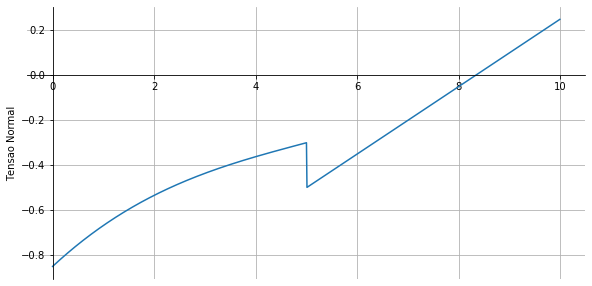

In [30]:
# Fazendo o gráfico da viga
import numpy as np                  
import matplotlib.pyplot as plt     


x0 = 0              # Valor inicial de x
xf = viga            # Valor final de x
dx = 0.01            # Passo da discretização dx = (xf - x0)/(np-1)

x = np.arange(x0, xf, dx)                 # cria um vetor de dados x-data
y = (M(x)*6)/(l*h**2)                  # calcula o vetor de dados y-data

for i in range (0,len(x)):
   if x[i] > Ftx:
      y[i] = (M2(x[i])*6)/(l*h**2)

        
largura = 10  # Largura da figura
altura  = 5   # Altura da figura
plt.figure(figsize =(largura, altura))     # Define o tamanho do gráfico
plt.grid()                       # Habilita a grade 
plt.xlabel('')
plt.ylabel('Tensao Normal')
plt.title('')
plt.plot(x, y)   # Faz o gráfico      
      # Habilita as legendas

ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.show()

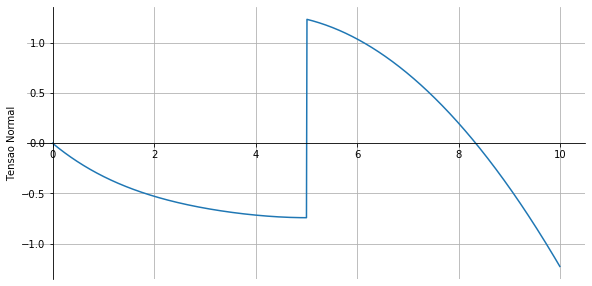

In [31]:
# Fazendo o gráfico da viga
import numpy as np                  
import matplotlib.pyplot as plt     


x0 = 0              # Valor inicial de x
xf = viga            # Valor final de x
dx = 0.01            # Passo da discretização dx = (xf - x0)/(np-1)

x = np.arange(x0, xf, dx)                 # cria um vetor de dados x-data
y = tensaoNorIy1(x)                         # calcula o vetor de dados y-data

for i in range (0,len(x)):
   if x[i] > Ftx:
      y[i] = -tensaoNorIy2(x[i])

        
largura = 10  # Largura da figura
altura  = 5   # Altura da figura
plt.figure(figsize =(largura, altura))     # Define o tamanho do gráfico
plt.grid()                       # Habilita a grade 
plt.xlabel('')
plt.ylabel('Tensao Normal')
plt.title('')
plt.plot(x, y)   # Faz o gráfico      
      # Habilita as legendas

ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.show()